### GROUP BY clause:
* This clause divides the rows returned from the SELECT statement into groups.
* For each group, you can apply an aggregate function.

PostgreSQL evaluates the GROUP BY clasue after the FROM and WHERE clauses. Before the HAVING, SELECT, ORDER BY and LIMIT clauses.
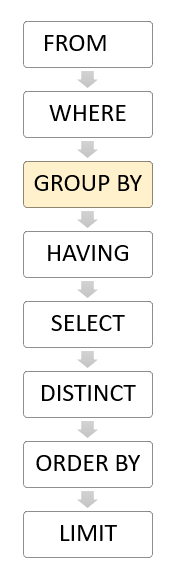

In [21]:
# import necessary library

import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

### GROUP BY without an aggregate function

In [23]:
query = """select customer_id
        from payment
        GROUP by customer_id 
        order by customer_id;"""
sqlio.read_sql_query(query,conn)

,customer_id
0,1
1,2
2,3
3,4
4,5
...,...
594,595
595,596
596,597
597,598


### GROUP BY with aggregate function

In [25]:
query = """select customer_id, count(*), sum(amount)
           from payment
           GROUP by customer_id
           order by sum(amount) DESC limit 10 ; """

sqlio.read_sql_query(query,conn)

,customer_id,count,sum
0,148,45,211.55
1,526,42,208.58
2,178,39,194.61
3,137,38,191.62
4,144,40,189.60
5,459,37,183.63
6,181,33,167.67
7,410,38,167.62
8,236,39,166.61
9,403,33,162.67


### Having Clause: 
* A search condition for a group or an aggregate
* used with the GROUP BY clause to filter group or aggregates based on a specified condition.
* PostgreSQL evaluates the HAVING clause after the FROM, WHERE, GROUP BY, and before the SELECT, DISTINCT, ORDER BY and LIMIT clauses.
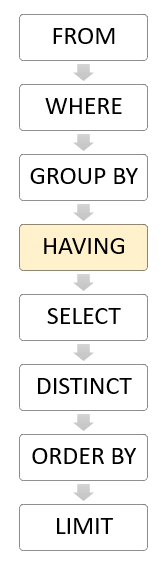

**Since the HAVING clause is evaluated before the SELECT clause, you cannot use column aliases in the HAVING clause. Because at the time of evaluating the HAVING clause, the column aliases specified in the SELECT clause are not available.**

#### **Write a query to select the only customers who have been spending more than 200**

In [29]:
query = """select customer_id, SUM(amount) as sum_amount
           from payment
           GROUP by customer_id
           having SUM (amount) > 200;"""

sqlio.read_sql_query(query,conn)

,customer_id,sum
0,526,208.58
1,148,211.55


#### Write a query to select the store that has more than 300 customers

In [30]:
query = """SELECT store_id, COUNT (customer_id)
           FROM customer
           GROUP BY store_id
           HAVING COUNT (customer_id) > 300;"""

sqlio.read_sql_query(query,conn)

,store_id,count
0,1,326
